In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd 
from scipy import stats as stat

In [ ]:
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
stocks = ['^NSEI']
start = datetime(2004,1,1)
end = datetime(2019,1,1)
rt = yf.download(stocks,start,end)
dt = pd.DataFrame(rt)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
dte = dt
dtest = dt.iloc[-242:]
dt = dt.iloc[:-242]

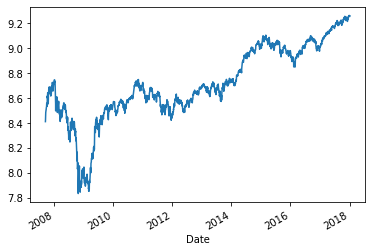

In [ ]:
df_log = np.log(dt)
df_log.plot()

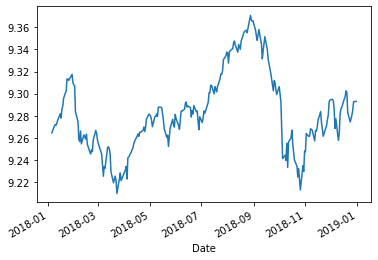

In [ ]:
dtest = np.log(dtest)
dtest.plot()

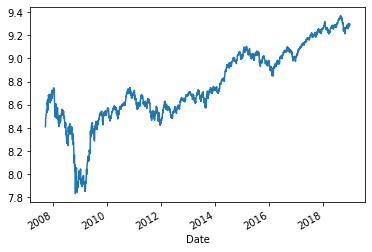

In [ ]:
dte = np.log(dte)
dte.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value',
                                        'No. of lags used',
                                        'Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_log)

Results of dickey fuller test
Test Statistics                  -0.607156
p-value                           0.869357
No. of lags used                  7.000000
Number of observations used    2505.000000
critical value (1%)              -3.432963
critical value (5%)              -2.862694
critical value (10%)             -2.567385
dtype: float64


**Thus we can not reject the null hypothesis and thus, the result idicates 
the presence of unit root non stationarity ** 

The random-walk model has widely been considered as a statistical model for
the movement of logged stock prices. Under such a model, the stock price is not predictable or mean reverting. To see this, the 1-step-ahead forecast of model  at the forecast origin h is

ph(1) = E(ph+1|ph, ph−1, . . .) = ph,

which is the log price of the stock at the forecast origin. Such a forecast has no practical value. The 2-step-ahead forecast is
ph(2) = E(ph+2|ph, ph−1, . . .) = E(ph+1 + ph+2|ph, ph−1, . . .)
= E(ph+1|ph, ph−1, . . .) = ph(1) = ph,

which again is the log price at the forecast origin. In fact, for any forecast horizon l > 0, we have
ph(l) = ph.

Thus, for all forecast horizons, point forecasts of a random-walk model are simply the value of the series at the forecast origin. Therefore, the process is not mean reverting.

The MA representation of the random-walk model in Eq. (2.35) is

pt = at + at−1 + at−2 +··· .
This representation has several important practical implications. First, the l step ahead forecast error is

ah(l) = a(h+l) + ··· + a(h+1),

so that Var[ah()] = l*σ^2
which diverges to infinity as l → ∞. The length of an interval forecast of ph+l will approach infinity as the forecast horizon-increases.
This result says that the usefulness of point forecast ph(l) diminishes as l increases, which again implies that the model is not predictable. Second, the unconditional variance of pt is unbounded because Var[ah(l)] approaches infinity as  increases.

Theoretically, this means that pt can assume any real value for a sufficiently large t. For the log price pt of an individual stock, this is plausible. Yet for market indexes, negative log price is very rare if it happens at all. In this sense, the adequacy of a random-walk model for market indexes is questionable.

Differencing 

In [ ]:
log_ret = np.log(dt) - np.log(dt.shift(1))
log_ret.dropna(inplace = True)
test_stationarity(log_ret)

Results of dickey fuller test
Test Statistics                 -19.260503
p-value                           0.000000
No. of lags used                  6.000000
Number of observations used    2505.000000
critical value (1%)              -3.432963
critical value (5%)              -2.862694
critical value (10%)             -2.567385
dtype: float64


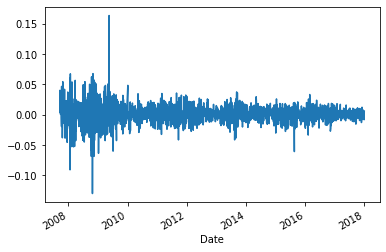

In [ ]:
log_ret.plot()


In [ ]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(df_log, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14103.493, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14116.683, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14117.453, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14104.147, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14115.920, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14116.298, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14114.536, Time=3.73 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14118.267, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14116.736, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14117.085, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14117.528, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14119.732, Time=1.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-14112.565, Time=1.30 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-14118.477, Time=1.52 sec
 ARIM

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_log, order=(2, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2513
Model:                 ARIMA(2, 1, 1)   Log Likelihood                7064.575
Date:                Wed, 10 Nov 2021   AIC                         -14121.151
Time:                        13:13:26   BIC                         -14097.836
Sample:                             0   HQIC                        -14112.688
                               - 2513                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7052      0.129      5.480      0.000       0.453       0.957
ar.L2         -0.0918      0.013     -7.267      0.000      -0.117      -0.067
ma.L1         -0.6256      0.129     -4.868      0.0

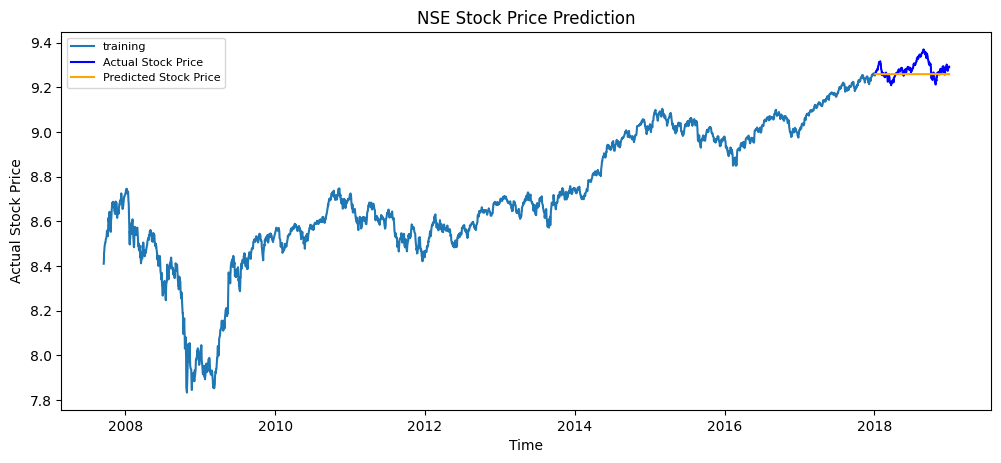

In [ ]:
fc = fitted.forecast(242, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc)
fc_series.index = dtest.index
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_log, label='training')
plt.plot(dtest, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('NSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc_series

Date
2018-01-05    9.260194
2018-01-08    9.260082
2018-01-09    9.259948
2018-01-10    9.259863
2018-01-11    9.259815
                ...   
2018-12-24    9.259760
2018-12-26    9.259760
2018-12-27    9.259760
2018-12-28    9.259760
2018-12-31    9.259760
Name: predicted_mean, Length: 242, dtype: float64

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_ret,lags = 10)
plt.show()

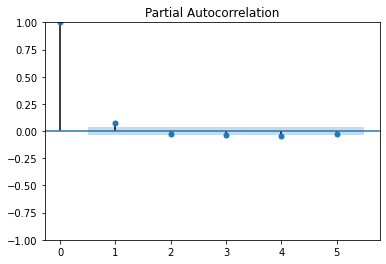

In [ ]:
plot_pacf(log_ret,lags = 5)
plt.show()